In [1]:
with open('data/snli_1.0/snli_1.0_train.txt') as f:
    train_data = f.read().split('\n')
    del train_data[0] #first row is the column headings, which we don't want
    
with open('data/snli_1.0/snli_1.0_dev.txt') as f:
    dev_data = f.read().split('\n')
    del dev_data[0]
    
with open('data/snli_1.0/snli_1.0_test.txt') as f:
    test_data = f.read().split('\n')
    del test_data[0]

In [2]:
import spacy

spacy_en = spacy.load('en')

def tokenizer(text): # create a tokenizer function
    return [tok.text for tok in spacy_en.tokenizer(text)]



    Only loading the 'en' tokenizer.



In [3]:
import numpy as np

char_lengths = np.zeros(len(train_data)*2-2) #*2 as we have two sentences per data point
word_lengths = np.zeros(len(train_data)*2-2)

i=0

for t in train_data:
    try:
        label, _, _, _, _, s1, s2, *_ = t.split('\t')
        char_lengths[i] = len(s1)
        char_lengths[i+1] = len(s2)
        word_lengths[i] = len(tokenizer(s1))
        word_lengths[i+1] = len(tokenizer(s2))
        i += 2
    except ValueError:
        continue

402.0
1.0
51.8783481656
27.6619015887


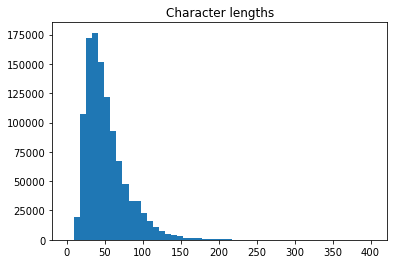

In [4]:
import matplotlib.pyplot as plt

print(np.max(char_lengths))
print(np.min(char_lengths))
print(np.mean(char_lengths))
print(np.std(char_lengths))

plt.hist(char_lengths, 50)
plt.title("Character lengths")
plt.show()

82.0
1.0
11.2103209658
5.68451243562


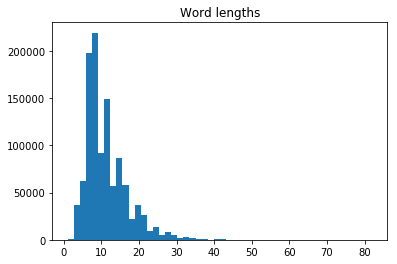

'78.0\n1.0\n10.1355916183\n5.30021206882'

In [5]:
print(np.max(word_lengths))
print(np.min(word_lengths))
print(np.mean(word_lengths))
print(np.std(word_lengths))

plt.hist(word_lengths, 50)
plt.title("Word lengths")
plt.show()

"""78.0
1.0
10.1355916183
5.30021206882"""

In [6]:
with open('data/processed/train.txt', 'w') as f:
    for t in train_data:
        try:
            label, _, _, _, _, s1, s2, *_ = t.split('\t')
            if label == '-': #a label of '-' means no agreement on the class, therefore we skip it
                continue
            f.write('{}\t{}\t{}\n'.format(s1, s2, label))
        except ValueError: #get error from the blank final line of the .txt file
            pass
        
with open('data/processed/dev.txt', 'w') as f:
    for t in dev_data:
        try:
            label, _, _, _, _, s1, s2, *_ = t.split('\t')
            if label == '-':
                continue
            f.write('{}\t{}\t{}\n'.format(s1, s2, label))
        except ValueError:
            pass
        
with open('data/processed/test.txt', 'w') as f:
    for t in test_data:
        try:
            label, _, _, _, _, s1, s2, *_ = t.split('\t')
            if label == '-':
                continue
            f.write('{}\t{}\t{}\n'.format(s1, s2, label))
        except ValueError:
            pass

In [7]:
with open('data/processed/train_40.txt', 'w') as f:
    for t in train_data:
        try:
            label, _, _, _, _, s1, s2, *_ = t.split('\t')
            if label == '-' or len(tokenizer(s1)) > 40 or len(tokenizer(s2)) > 40: #a label of '-' means no agreement on the class, therefore we skip it
                continue
            f.write('{}\t{}\t{}\n'.format(s1, s2, label))
        except ValueError: #get error from the blank final line of the .txt file
            pass
        
with open('data/processed/dev_40.txt', 'w') as f:
    for t in dev_data:
        try:
            label, _, _, _, _, s1, s2, *_ = t.split('\t')
            if label == '-' or len(tokenizer(s1)) > 40 or len(tokenizer(s2)) > 40:
                continue
            f.write('{}\t{}\t{}\n'.format(s1, s2, label))
        except ValueError:
            pass
        
with open('data/processed/test_40.txt', 'w') as f:
    for t in test_data:
        try:
            label, _, _, _, _, s1, s2, *_ = t.split('\t')
            if label == '-' or len(tokenizer(s1)) > 40 or len(tokenizer(s2)) > 40:
                continue
            f.write('{}\t{}\t{}\n'.format(s1, s2, label))
        except ValueError:
            pass